# Exploration of COVID-19 data source

The COVID-19 data source is available [here](https://github.com/owid/covid-19-data/tree/master/public/data). For an interactive experience, visit [Binder](https://mybinder.org/v2/gh/jitrapon/mads-milestone-i/main).

Credit: [How to integrate Binder](https://github.com/alan-turing-institute/the-turing-way/blob/main/workshops/boost-research-reproducibility-binder/workshop-presentations/zero-to-binder-python.md).

## Manipulating Vaccination Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import FacetGrid

In [2]:
covid_df = pd.read_csv('data/owid-covid-data.csv')

In [3]:
covid_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
covid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
from pandas import DataFrame


def filter_country_vac(df: DataFrame, country: str) -> DataFrame:
    country_df = df[df['location'] == country]
    country_df['date'] = pd.to_datetime(country_df['date'])
    country_df.fillna(0, inplace=True)
    return country_df[['date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
                       'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
                       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                       'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
                       'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']]

In [6]:
covid_us_df = filter_country_vac(covid_df, 'United States')
covid_th_df = filter_country_vac(covid_df, 'Thailand')
covid_kor_df = filter_country_vac(covid_df, 'South Korea')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [7]:
covid_us_df

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
145011,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
145012,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
145013,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
145014,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
145015,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145725,2022-01-05,517246098.0,246246794.0,205729958.0,74025924.0,1230032.0,875962.0,155.79,74.17,61.97,22.30,2638.0,251176.0,0.076
145726,2022-01-06,518397714.0,246561964.0,205896234.0,74698923.0,1151616.0,839923.0,156.14,74.26,62.02,22.50,2530.0,239458.0,0.072
145727,2022-01-07,519227706.0,246780227.0,206023108.0,75185888.0,829992.0,878428.0,156.39,74.33,62.05,22.65,2646.0,247864.0,0.075
145728,2022-01-08,519335421.0,246812938.0,206046093.0,75237089.0,107715.0,880983.0,156.42,74.34,62.06,22.66,2653.0,248053.0,0.075


## Visualizing Vaccination Data

In [8]:
def set_plot_theme():
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params, font_scale=1.2)


set_plot_theme()

In [169]:
def prepare_dataframe_for_visualization(df: DataFrame, melt: bool=True):
    df = df.drop(
        ['total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
         'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed',
         'new_people_vaccinated_smoothed_per_hundred'], axis=1)
    df = df[~df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].eq(0).all(
        axis=1)]  # drop all rows with those columns eq 0
    if melt:
        df = df.melt(id_vars=['date'])
    return df

In [10]:
def visualize_country_vac(df: DataFrame, width, height, title) -> FacetGrid:
    ax = sns.relplot(x="date", y="value", hue='variable', kind='line', data=df)
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    return ax

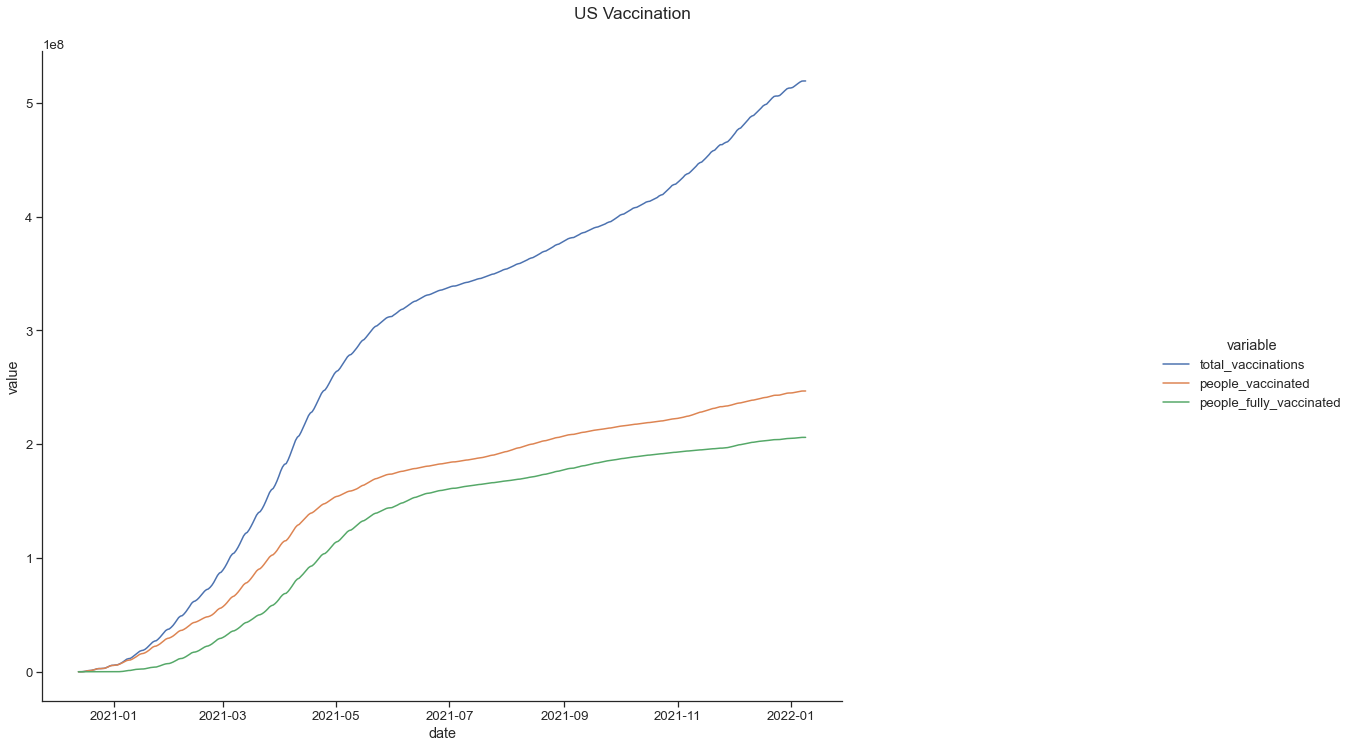

In [11]:
visualize_country_vac(prepare_dataframe_for_visualization(covid_us_df), 20, 11, 'US Vaccination')

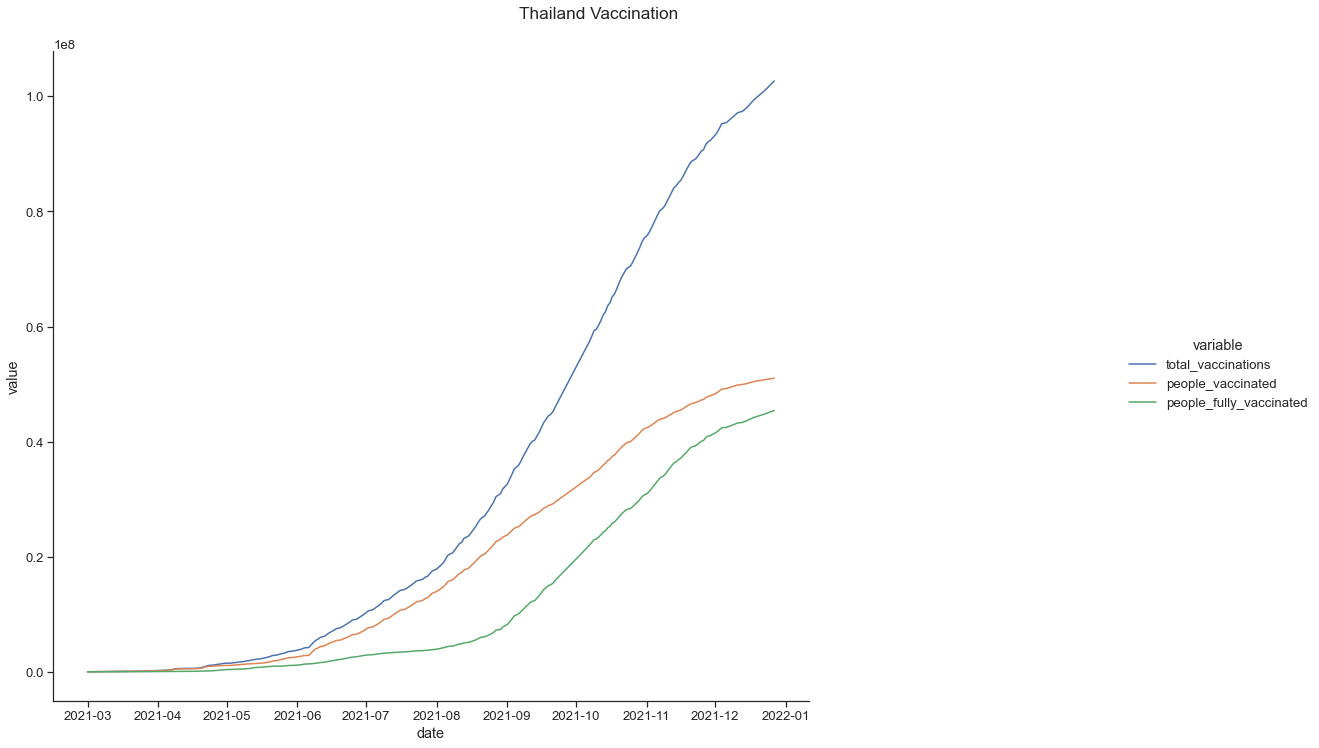

In [12]:
visualize_country_vac(prepare_dataframe_for_visualization(covid_th_df), 20, 11, 'Thailand Vaccination')

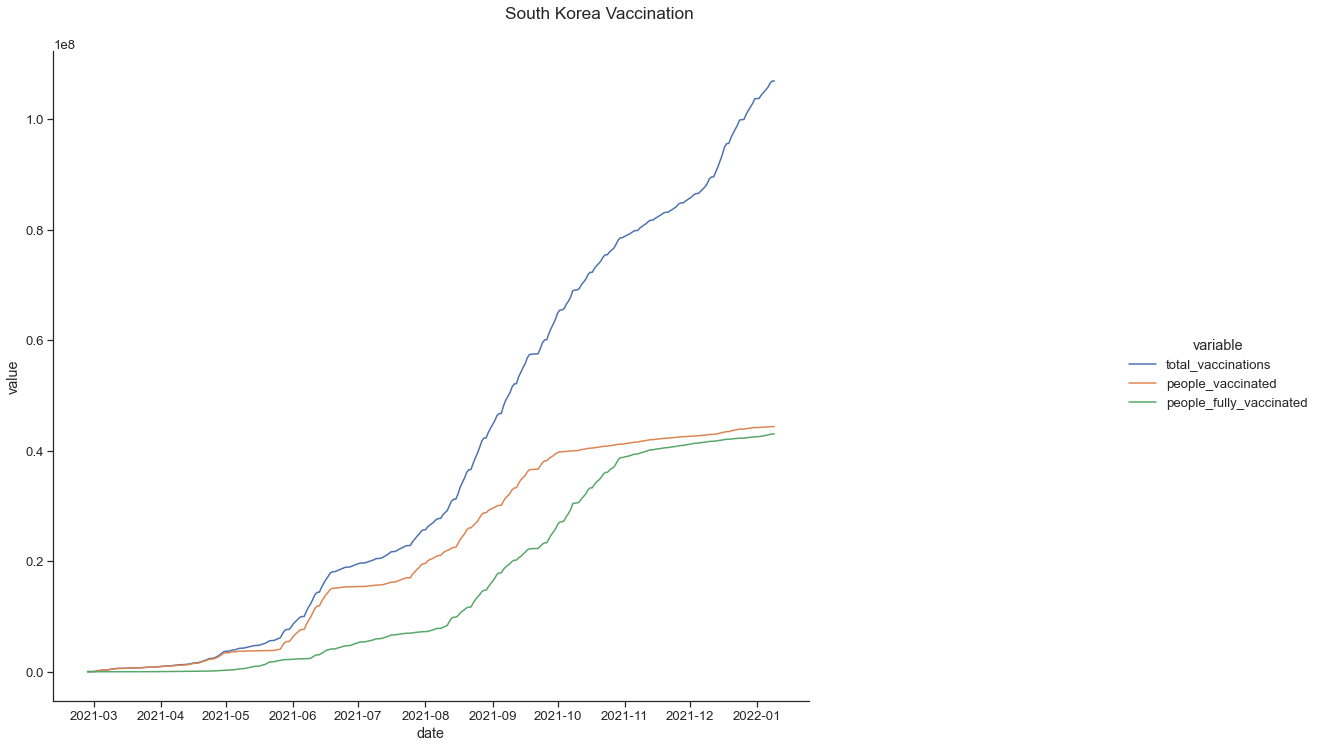

In [14]:
visualize_country_vac(prepare_dataframe_for_visualization(covid_kor_df), 20, 11, 'South Korea Vaccination')

## Manipulating Confirmed Case Data

In [15]:
def filter_country_cases(df: DataFrame, country: str) -> DataFrame:
    country_df = df[df['location'] == country]
    country_df['date'] = pd.to_datetime(country_df['date'])
    country_df.fillna(0, inplace=True)
    return country_df[
        ['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million',
         'new_cases_smoothed_per_million', 'positive_rate']]

In [18]:
covid_us_case_df = filter_country_cases(covid_df, 'United States')
covid_th_case_df = filter_country_cases(covid_df, 'Thailand')
covid_kor_case_df = filter_country_cases(covid_df, 'South Korea')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [20]:
covid_us_case_df

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,positive_rate
145011,2020-01-22,1.0,0.0,0.000,0.003,0.000,0.000,0.0
145012,2020-01-23,1.0,0.0,0.000,0.003,0.000,0.000,0.0
145013,2020-01-24,2.0,1.0,0.000,0.006,0.003,0.000,0.0
145014,2020-01-25,2.0,0.0,0.000,0.006,0.000,0.000,0.0
145015,2020-01-26,5.0,3.0,0.000,0.015,0.009,0.000,0.0
...,...,...,...,...,...,...,...,...
145725,2022-01-05,57700873.0,623308.0,574507.571,173320.097,1872.273,1725.688,0.0
145726,2022-01-06,58487697.0,786824.0,602547.143,175683.535,2363.438,1809.912,0.0
145727,2022-01-07,59388529.0,900832.0,663735.286,178389.426,2705.891,1993.708,0.0
145728,2022-01-08,59767221.0,378692.0,701199.571,179526.929,1137.503,2106.242,0.0


In [39]:
def visualize_country_cases(df: DataFrame, width, height, title) -> FacetGrid:
    ax = sns.relplot(x="date", y="new_cases_smoothed", kind='line', data=df)
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    return ax

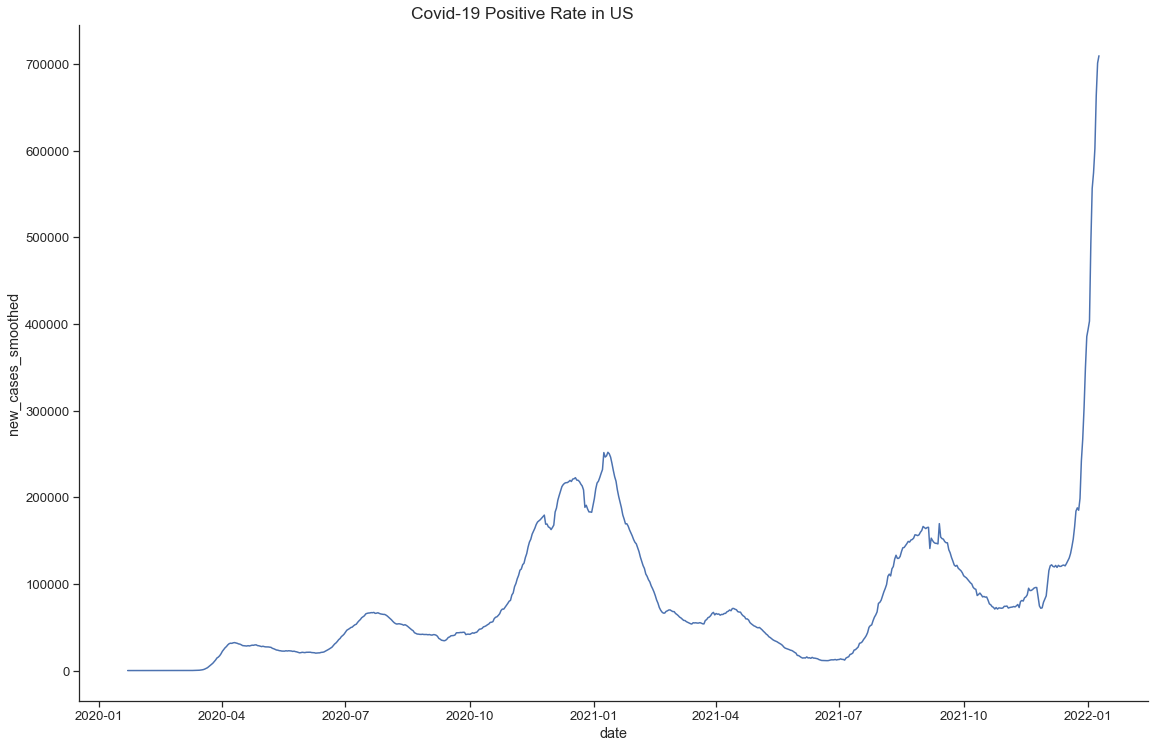

In [40]:
visualize_country_cases(covid_us_case_df, 20, 11, 'Covid-19 Positive Rate in US')

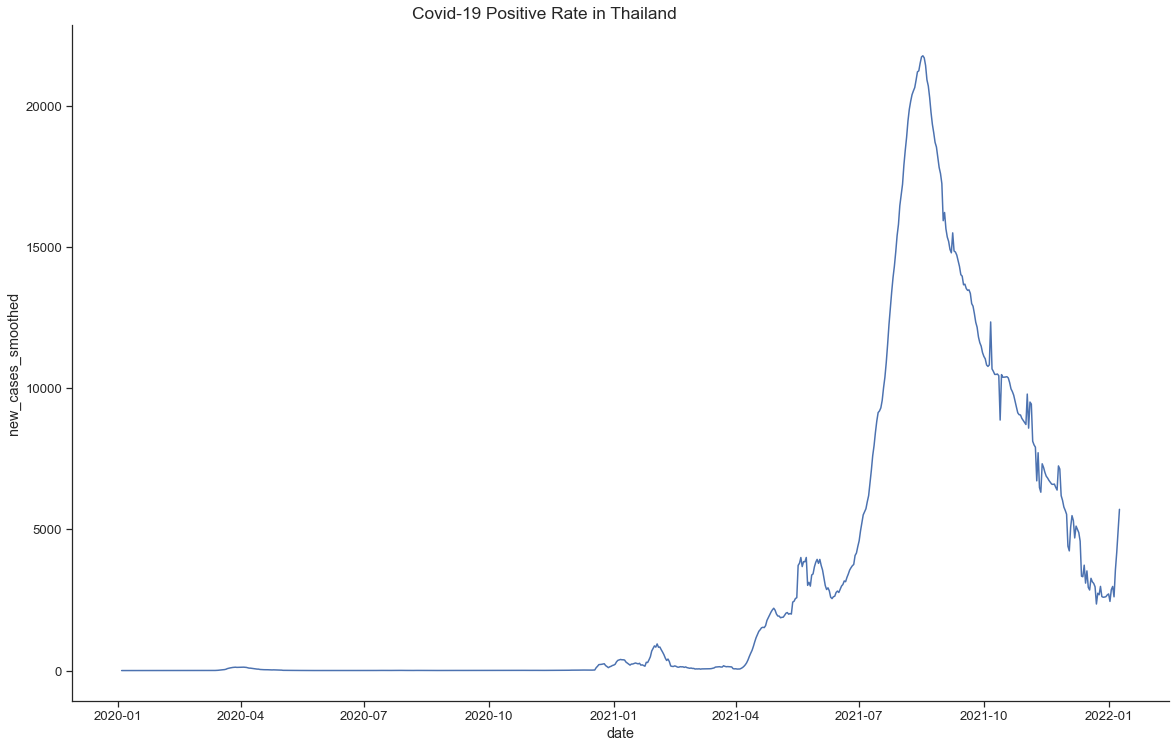

In [41]:
visualize_country_cases(covid_th_case_df, 20, 11, 'Covid-19 Positive Rate in Thailand')

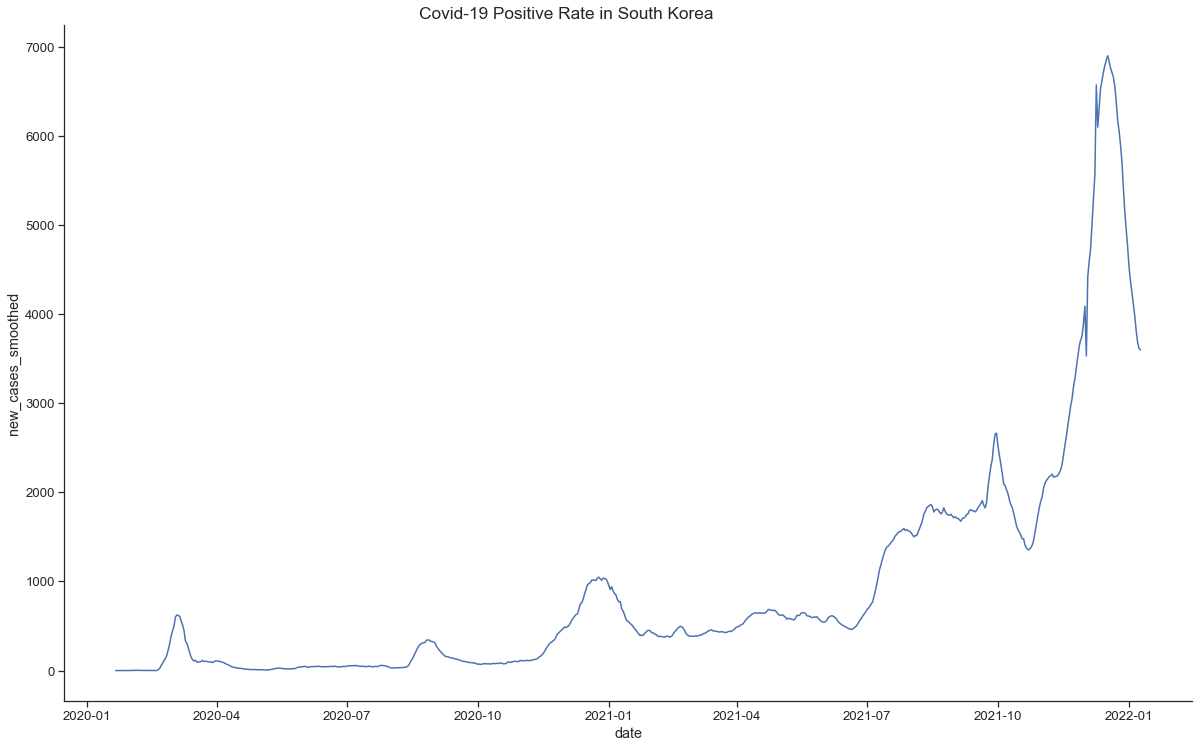

In [42]:
visualize_country_cases(covid_kor_case_df, 20, 11, 'Covid-19 Positive Rate in South Korea')

## Visualizing Search Term Trends

In [54]:
def get_search_trend(csv: str) -> DataFrame:
    df = pd.read_csv(csv, skiprows=2)
    df['Week'] = pd.to_datetime(df['Week'])
    df.columns = ['date', 'interest']
    return df

In [56]:
search_trend_th = get_search_trend('data/search-th-agoda.csv')
search_trend_th

,date,interest
0,2021-01-03,46
1,2021-01-10,27
2,2021-01-17,31
3,2021-01-24,33
4,2021-01-31,36
5,2021-02-07,44
6,2021-02-14,43
7,2021-02-21,58
8,2021-02-28,52
9,2021-03-07,47


In [59]:
def visualize_country_search_trend(df: DataFrame, width, height, title) -> FacetGrid:
    ax = sns.relplot(x="date", y="interest", data=df, kind='line')
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    return ax

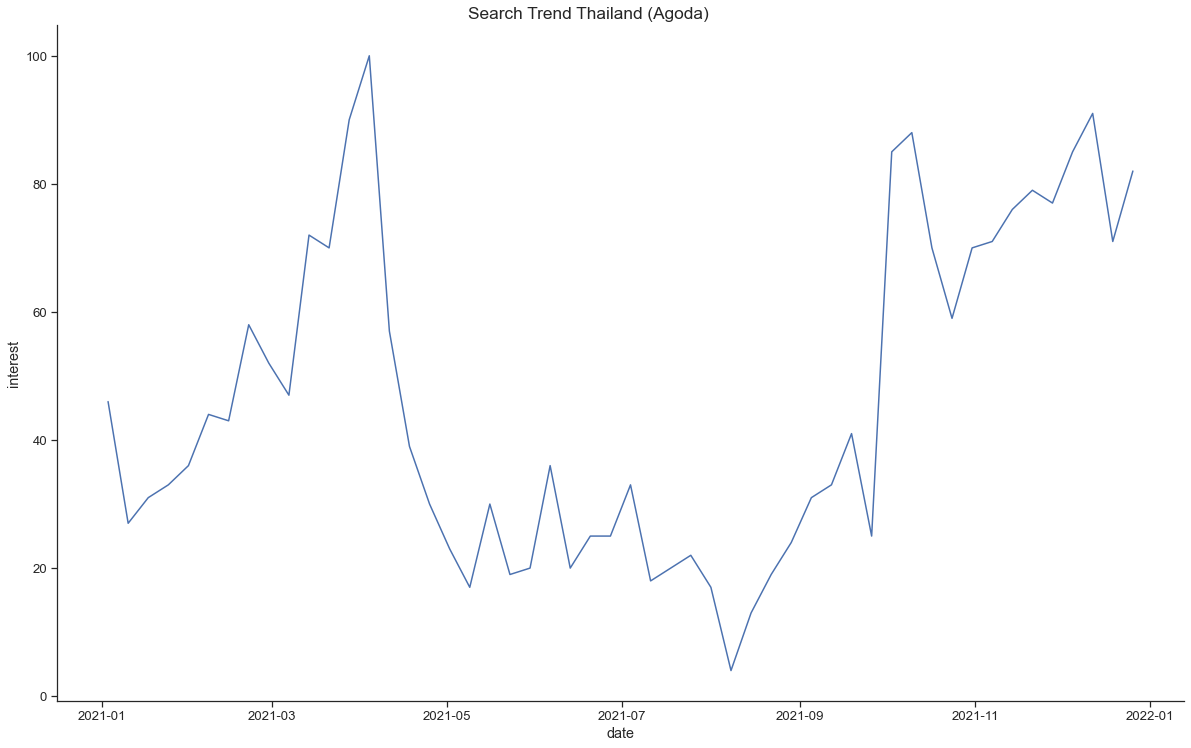

In [60]:
visualize_country_search_trend(search_trend_th, 20, 11, 'Search Trend Thailand (Agoda)')

In [226]:
search_trend_th_norm = search_trend_th.iloc[:, 1:].apply(lambda x: (x-x.min())/(x.max() - x.min()), axis=0)
search_trend_th_norm['date'] = search_trend_th['date']
search_trend_th_norm = search_trend_th_norm.set_index('date')
search_trend_th_norm = search_trend_th_norm.asfreq('D')
search_trend_th_norm = search_trend_th_norm.interpolate()
search_trend_th_norm = search_trend_th_norm.reset_index()
# visualize_country_search_trend(search_trend_th_norm, 20, 11, 'Search Trend Thailand (Agoda) - Normalized')

In [232]:
covid_th_df_norm = prepare_dataframe_for_visualization(covid_th_df, False)
covid_th_df_norm = covid_th_df_norm.iloc[:, 1:].apply(lambda x: (x-x.min())/(x.max() - x.min()), axis=0)
covid_th_df_norm['date'] = covid_th_df['date']

In [249]:
covid_th_case_df_norm = covid_th_case_df.iloc[:, 2:].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
covid_th_case_df_norm['date'] = covid_th_case_df['date']
covid_th_case_df_norm = covid_th_case_df_norm.drop(
    ['new_cases', 'total_cases_per_million', 'new_cases_per_million', 'positive_rate', 'new_cases_smoothed_per_million'], axis=1)
mask = (covid_th_case_df_norm['date'] >= pd.Timestamp('2021-01-01')) & (covid_th_case_df_norm['date'] <= pd.Timestamp('2021-12-31'))
covid_th_case_df_norm = covid_th_case_df_norm[mask]
# visualize_country_cases(covid_th_case_df_norm, 20, 11, 'Normalized')

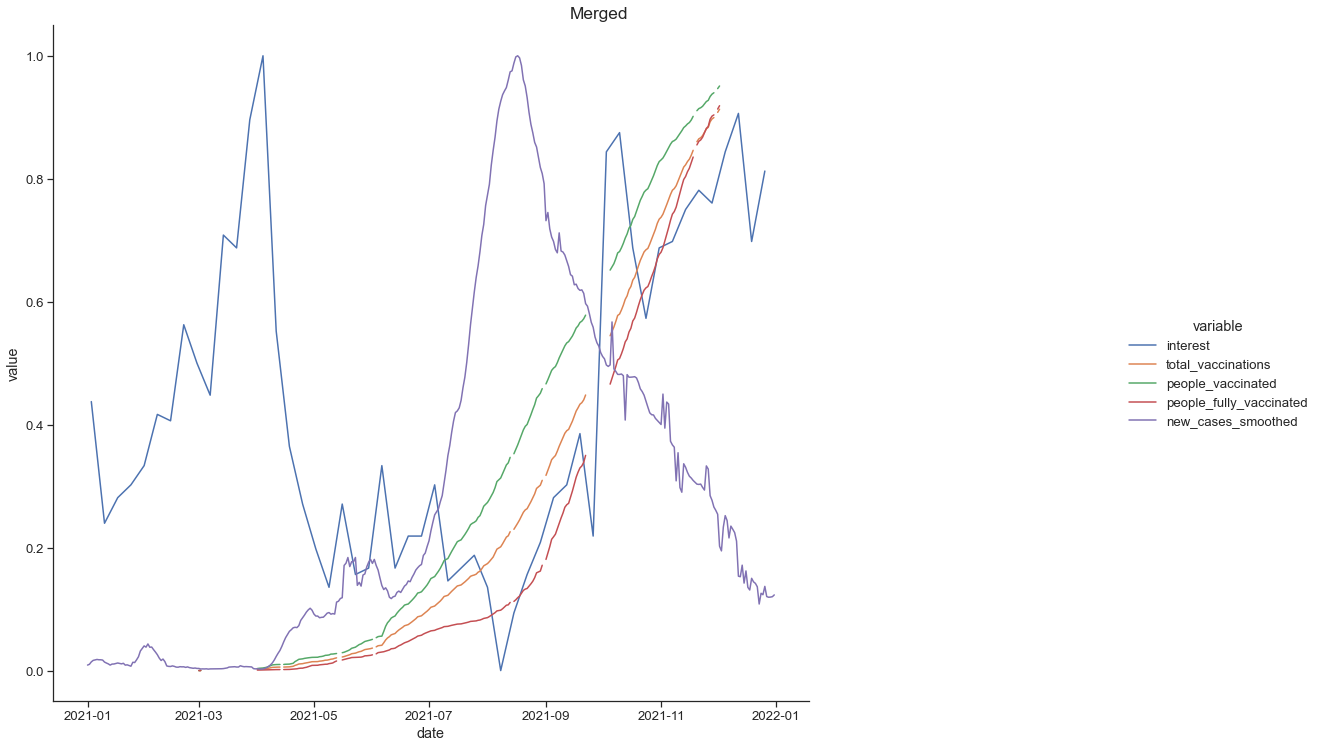

In [250]:
def visualize_combined(df: DataFrame, title, width=20, height=11) -> FacetGrid:
    ax = sns.relplot(x="date", y="value", hue='variable', kind='line', data=df)
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    return ax


merged = pd.merge(search_trend_th_norm, covid_th_df_norm, on='date', how='outer')
merged = pd.merge(merged, covid_th_case_df_norm, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
# merged = merged.interpolate()
visualize_combined(merged, 'Merged')